In [20]:
import pandas as pd
import numpy as np
import pickle
import torch
from torch_geometric.loader import DataLoader
from modules.utils_data import get_graphs, default_properties as props
from modules.utils_plotting import plot_scatters

In [21]:
# Load graphs
test = pd.read_csv("test.csv")
test_graphs = get_graphs(test,dash_charges=True,scaled =True, test=True, save_graphs=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

Loading previously created scaler
Loading previously created graphs


In [30]:
# Load model
model = torch.load('model_VP_logP_test.pt')
model = model.to(torch.device('cuda'))
predictions = []
targets = []
smiles = []
for data in test_loader:
    smiles.extend(data.smiles)
    targets.extend(data.y.cpu().detach().numpy())
    # Forward pass on gpu
    data = data.to(torch.device('cuda'))
    out = model(data.x, data.edge_index, data.edge_attr,data.batch)
    # Move back to cpu and fill predictions
    predictions.extend(out.cpu().detach().numpy())

In [31]:
df_preds = pd.DataFrame(predictions, columns=props)
df_targets = pd.DataFrame(targets, columns=props)
df_preds['smiles'] = smiles
df_targets['smiles'] = smiles

In [32]:
# Unscale (optional)
scaler = pickle.load(open('scaler.pkl', 'rb'))
for df in [df_preds,df_targets]:
    df.replace(-1, np.nan, inplace=True)
    df[props] = scaler.inverse_transform(df[props])
    

In [27]:
df['LogVP'].max(), df['LogVP'].min()

(9.475096, -12.397901)

In [33]:
# MAE per property
for prop in props:
    print(f'{prop} MAE: {np.abs(df_preds[prop]-df_targets[prop]).mean()}')

LogVP MAE: 16.475017547607422
LogP MAE: 5.256857395172119
LogOH MAE: 7.486889839172363
LogBCF MAE: 7.001587867736816
LogHalfLife MAE: 2.9432432651519775
BP MAE: 257.4293518066406
Clint MAE: 15.754950523376465
FU MAE: 1.0283362865447998
LogHL MAE: 12.056736946105957
LogKmHL MAE: 4.880131244659424
LogKOA MAE: 15.447246551513672
LogKOC MAE: 7.575759410858154
MP MAE: 435.74786376953125
LogMolar MAE: 14.117562294006348


Property: LogVP
kendall_tau: 0.6292049734095605
rmse_overall: 22.69778060913086
mae_overall: 22.555387496948242
within_03_overall: 0.0
within_1_overall: 0.0
R2: -38.73733541389466
Pearson: 0.8005736833685351


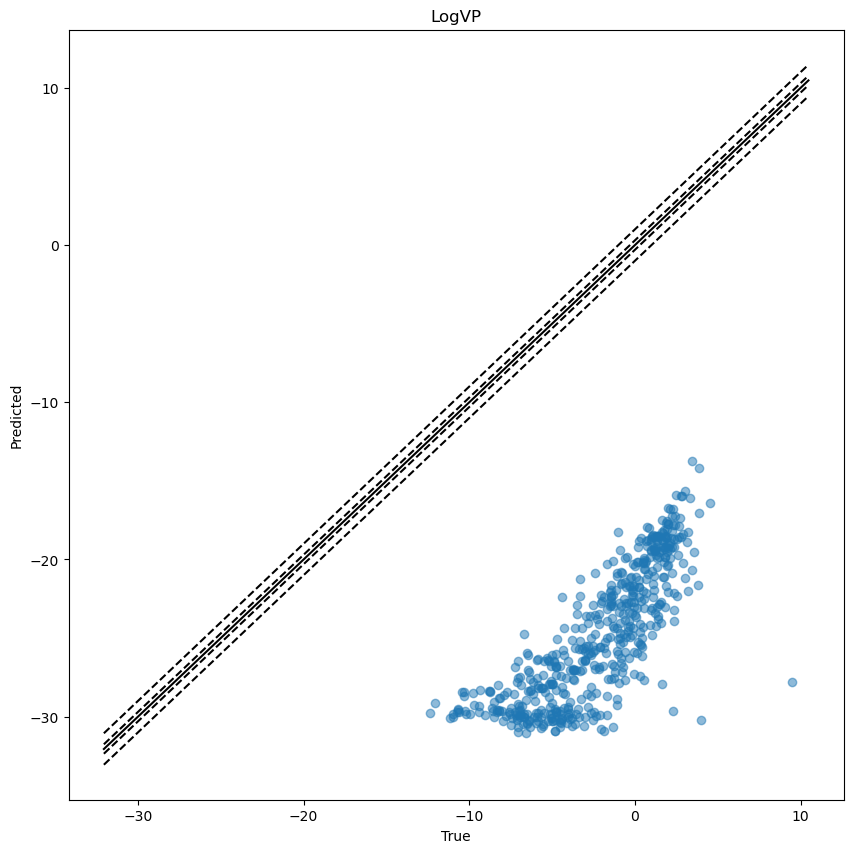

Property: LogP
kendall_tau: -0.03938115578447692
rmse_overall: 8.581300735473633
mae_overall: 7.68250846862793
within_03_overall: 0.0010741138560687433
within_1_overall: 0.004296455424274973
R2: -21.16268289123659
Pearson: -0.04665037042974117


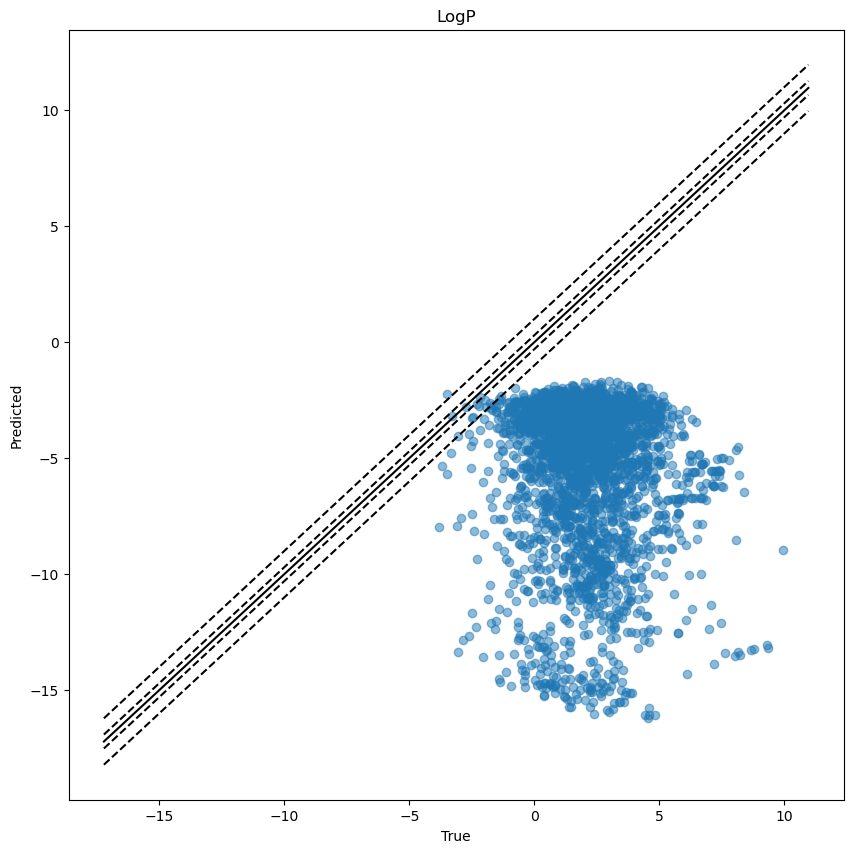

Property: LogOH
kendall_tau: -0.13201048392703726
rmse_overall: 10.21855640411377
mae_overall: 10.076530456542969
within_03_overall: 0.0
within_1_overall: 0.0
R2: -68.96519070308028
Pearson: -0.20003186196345596


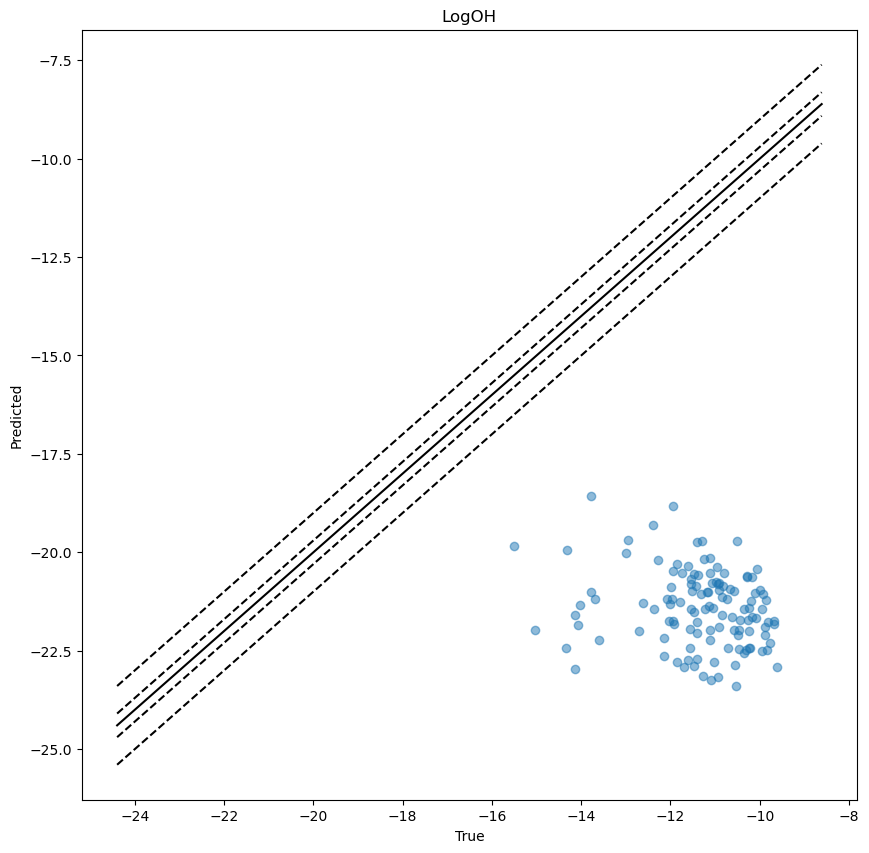

Property: LogBCF
kendall_tau: 0.14968196057017782
rmse_overall: 8.937625885009766
mae_overall: 8.806764602661133
within_03_overall: 0.0
within_1_overall: 0.0
R2: -33.034004686437
Pearson: 0.14467464988806814


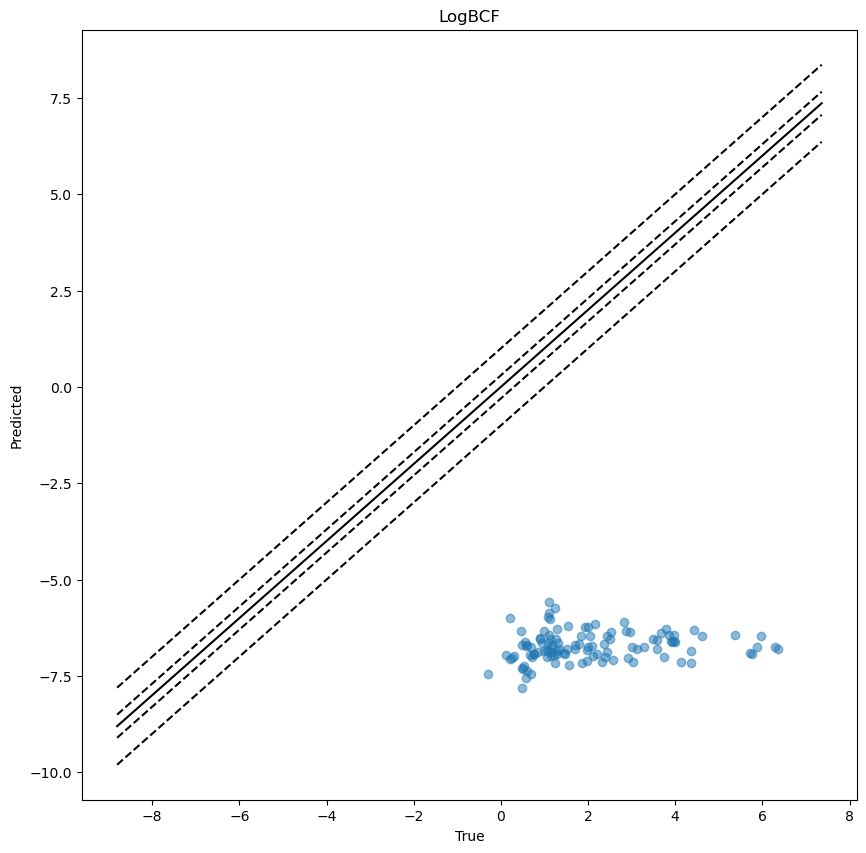

Property: LogHalfLife
kendall_tau: -0.08261418976646202
rmse_overall: 3.7574942111968994
mae_overall: 3.6933791637420654
within_03_overall: 0.0
within_1_overall: 0.0
R2: -29.98372360519519
Pearson: -0.08321045409892688


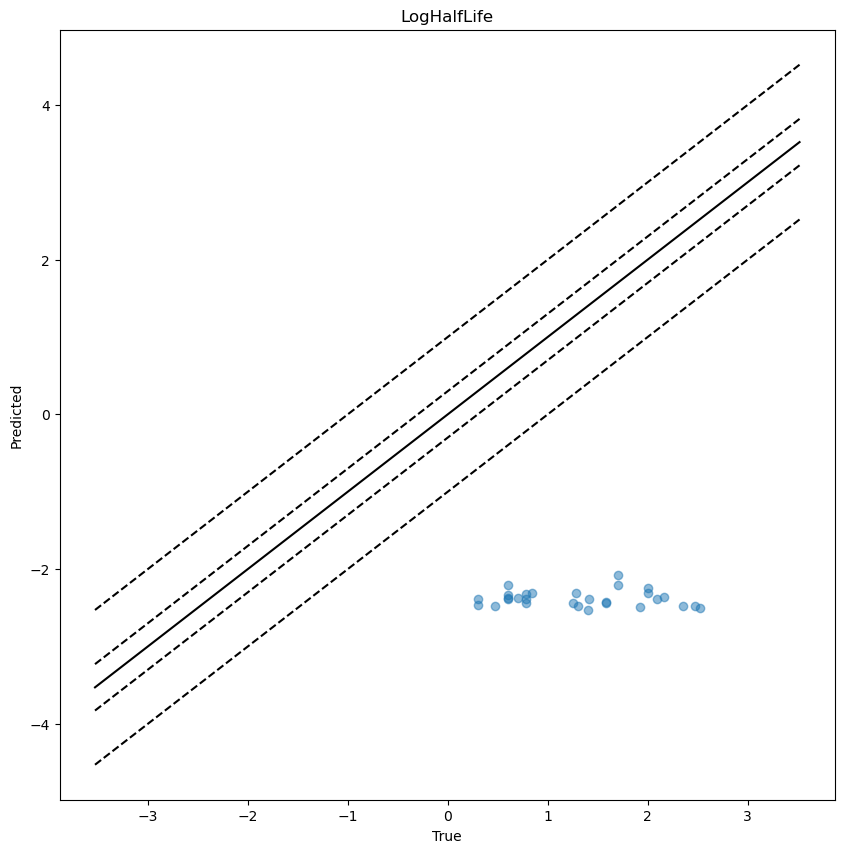

Property: BP
kendall_tau: -0.5066678637288267
rmse_overall: 467.7708435058594
mae_overall: 391.7117919921875
within_03_overall: 0.0
within_1_overall: 0.0
R2: -30.65929324592486
Pearson: -0.6702377301936425


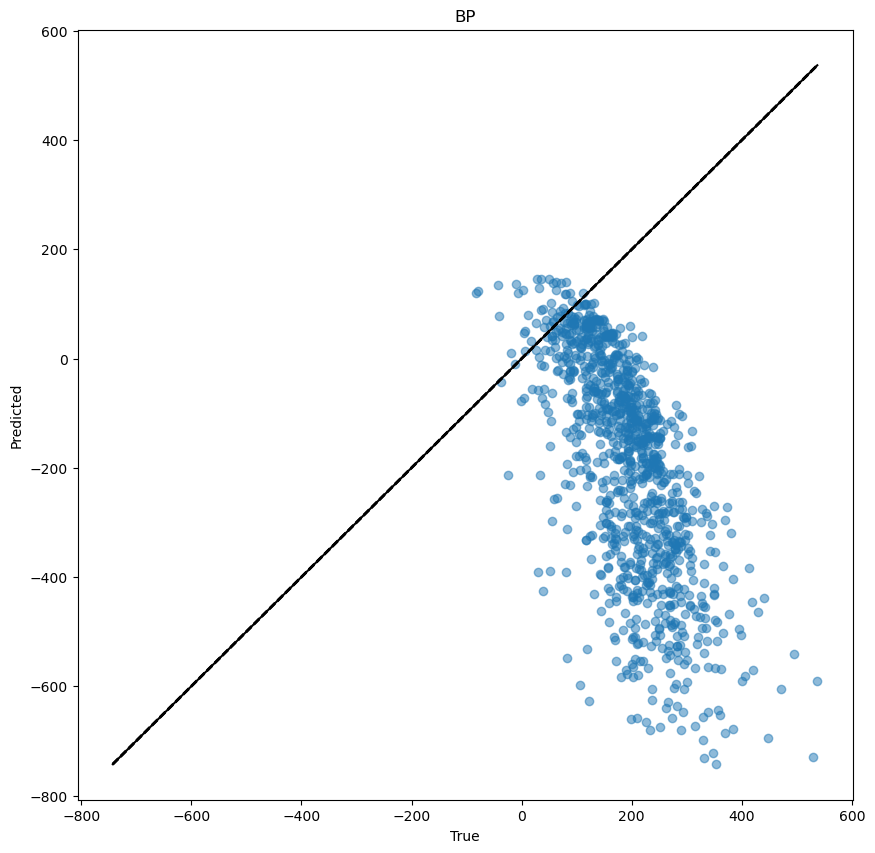

Property: Clint
kendall_tau: 0.08565752343496905
rmse_overall: 16.80205535888672
mae_overall: 16.556264877319336
within_03_overall: 0.0
within_1_overall: 0.0
R2: -33.14153179935227
Pearson: 0.09446247513907842


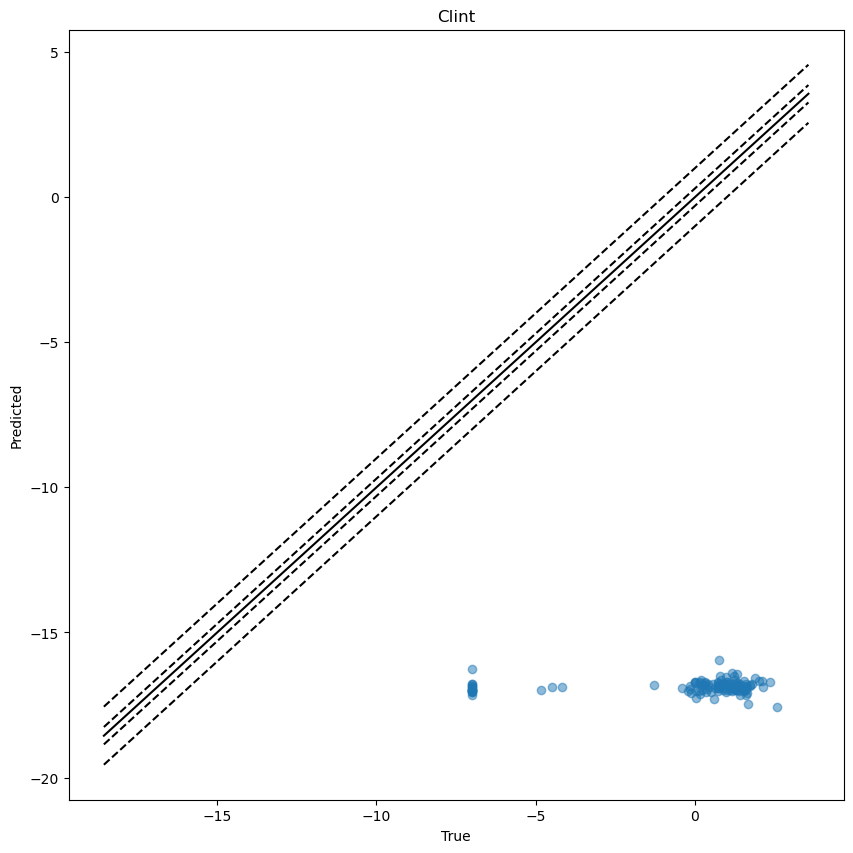

Property: FU
kendall_tau: -0.011859459680232401
rmse_overall: 1.1793094873428345
mae_overall: 1.1259251832962036
within_03_overall: 0.0
within_1_overall: 0.53156146179402
R2: -11.494031854567096
Pearson: -0.016592823625563344


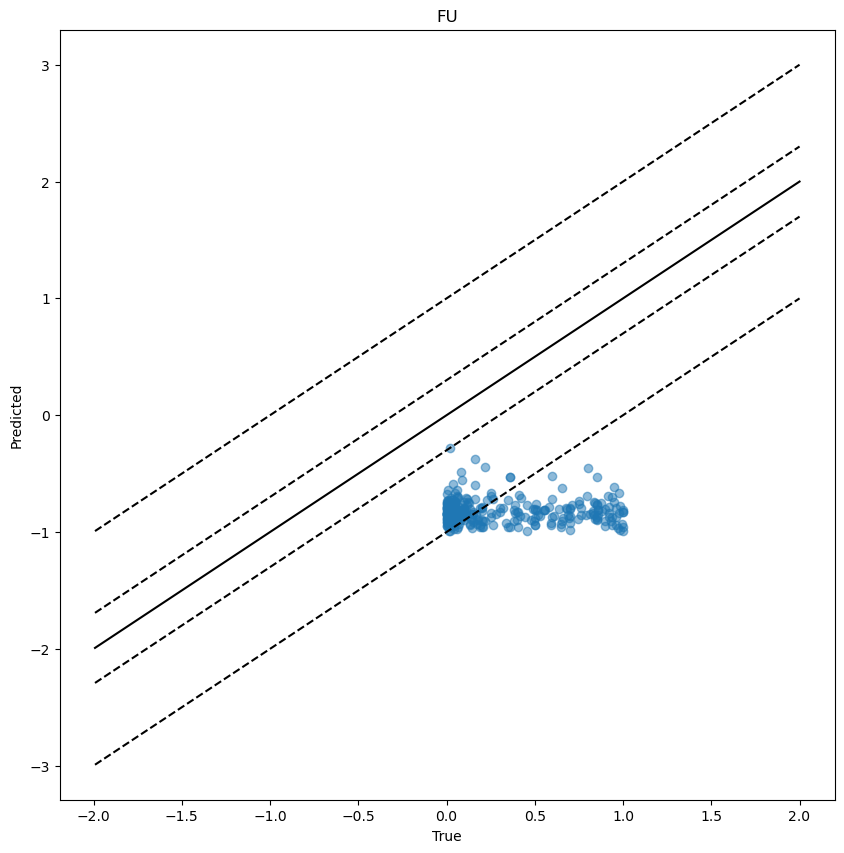

Property: LogHL
kendall_tau: 0.2072658566856204
rmse_overall: 18.469045639038086
mae_overall: 18.375749588012695
within_03_overall: 0.0
within_1_overall: 0.0
R2: -79.39865375906136
Pearson: 0.4421872670365233


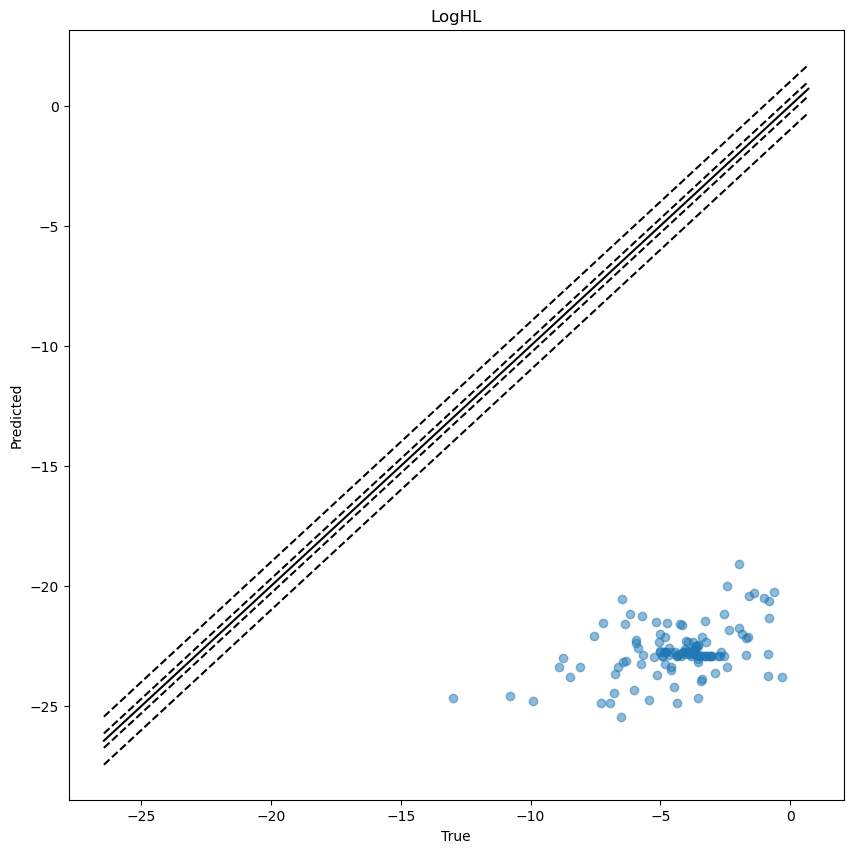

Property: LogKmHL
kendall_tau: 0.28044030735738973
rmse_overall: 6.052382469177246
mae_overall: 5.928057670593262
within_03_overall: 0.0
within_1_overall: 0.0
R2: -20.737328268476
Pearson: 0.38196323351608985


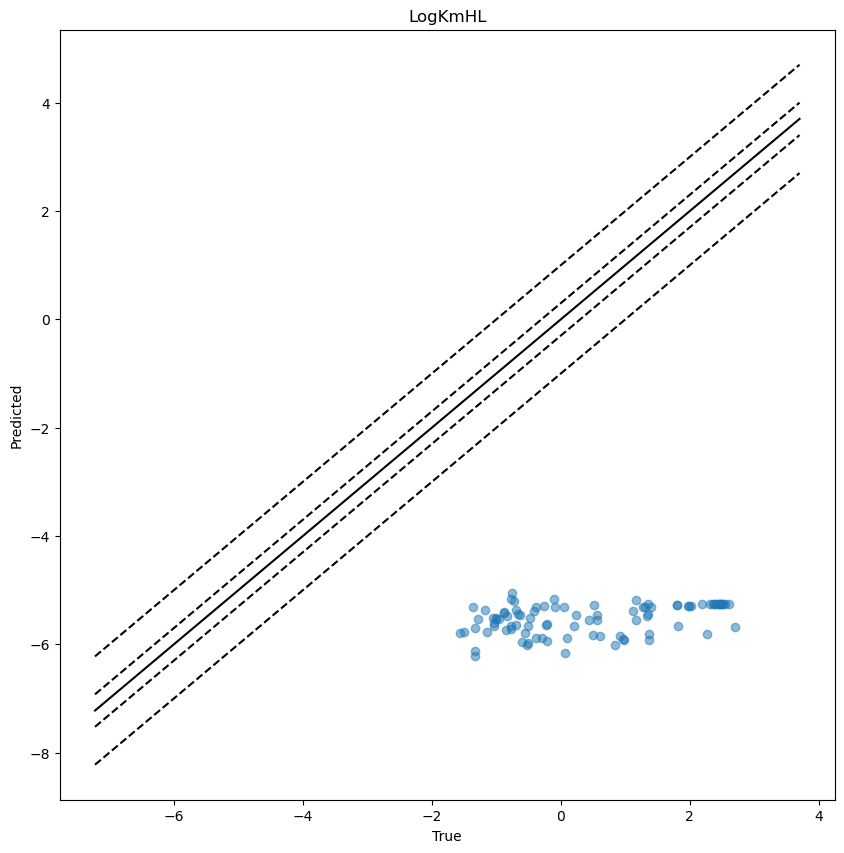

Property: LogKOA
kendall_tau: -0.2322416203284113
rmse_overall: 19.884136199951172
mae_overall: 19.601776123046875
within_03_overall: 0.0
within_1_overall: 0.0
R2: -42.50795277432699
Pearson: -0.3380345710119606


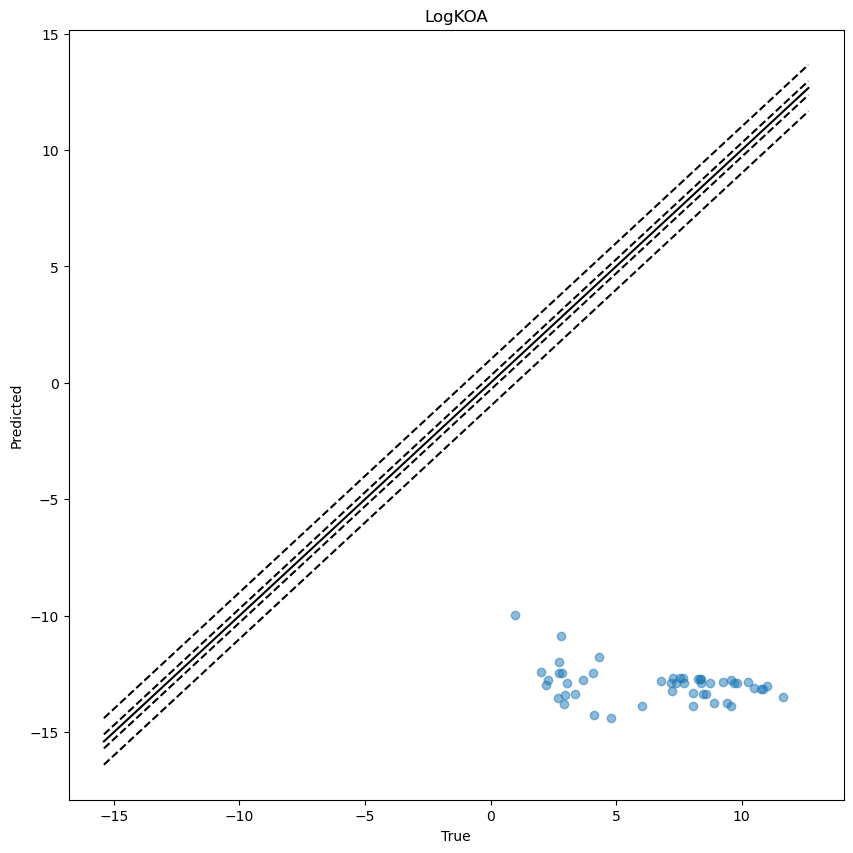

Property: LogKOC
kendall_tau: 0.13407392326648374
rmse_overall: 8.89002799987793
mae_overall: 8.813252449035645
within_03_overall: 0.0
within_1_overall: 0.0
R2: -55.436465097319186
Pearson: 0.18018481291537455


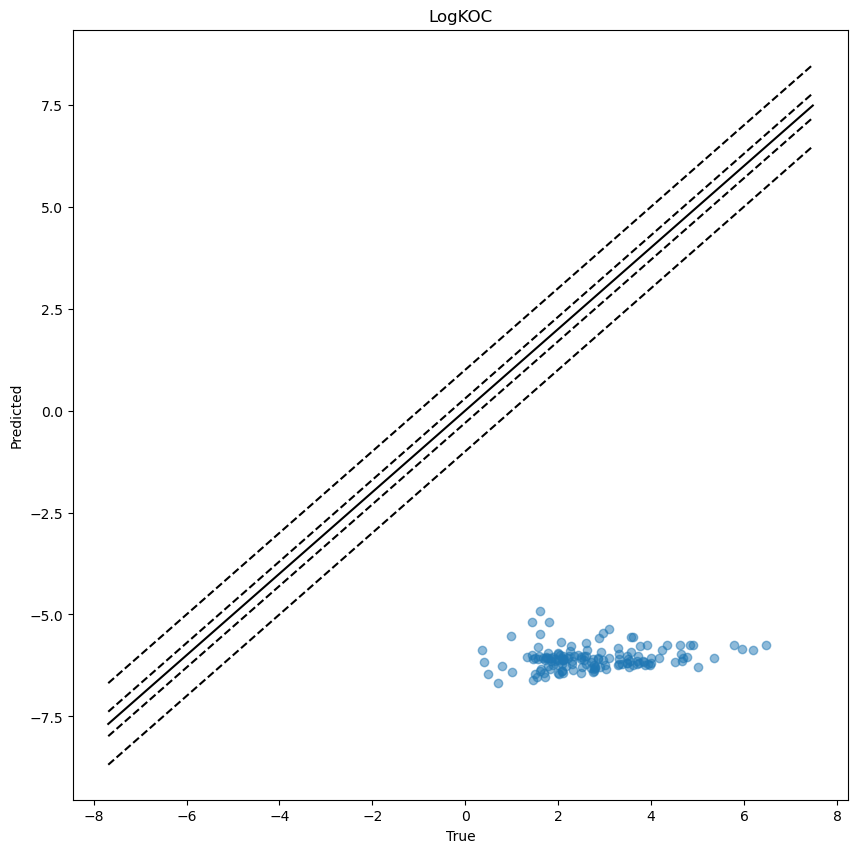

Property: MP
kendall_tau: -0.19137254731542352
rmse_overall: 552.5022583007812
mae_overall: 529.9607543945312
within_03_overall: 0.0
within_1_overall: 0.0
R2: -29.886410961957623
Pearson: -0.30062086509373925


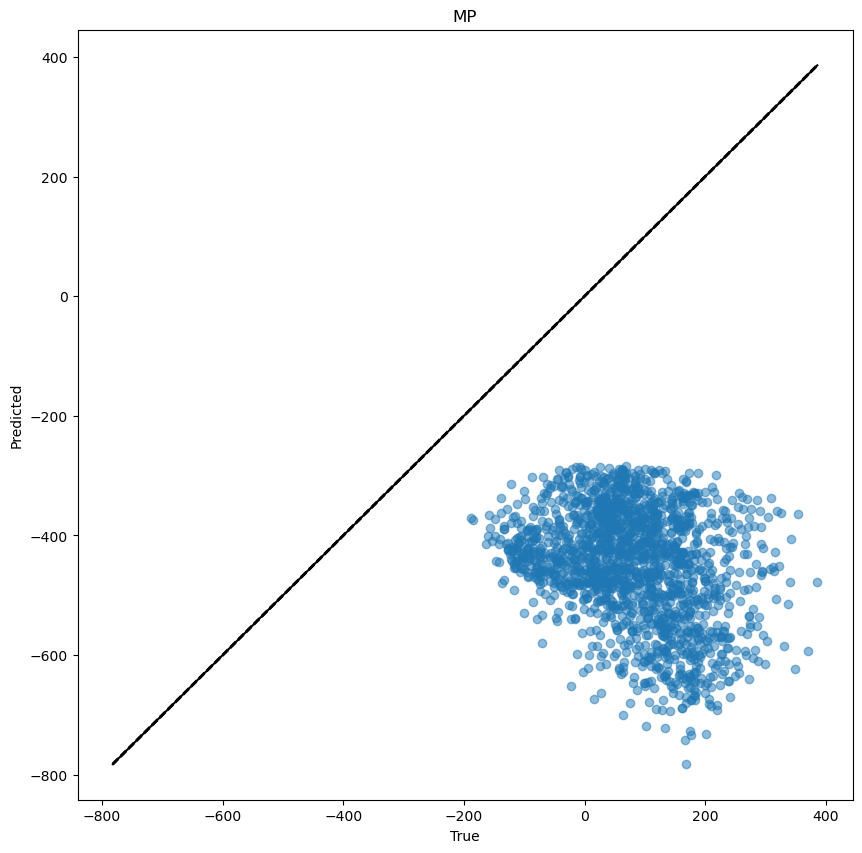

Property: LogMolar
kendall_tau: 0.35702642366808185
rmse_overall: 20.046165466308594
mae_overall: 19.922863006591797
within_03_overall: 0.0
within_1_overall: 0.0
R2: -68.54324893079668
Pearson: 0.4625984352569663


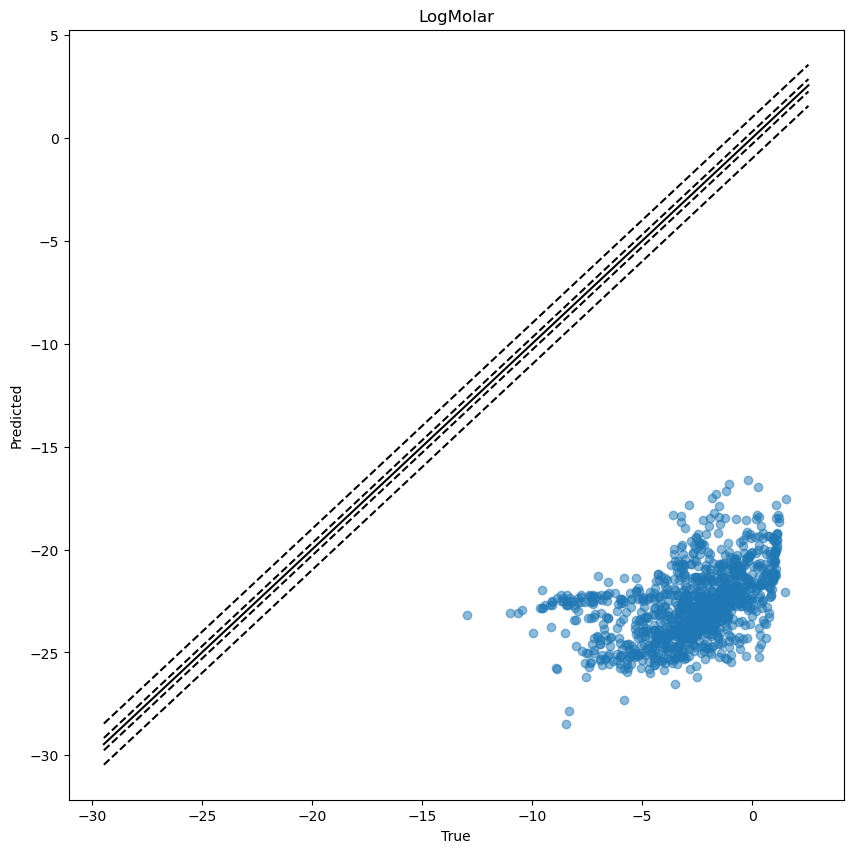

In [29]:
plot_scatters(df_preds, df_targets)